# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load Dataset


In [2]:
df = pd.read_csv("Datasets/car_price_dataset.csv")
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


# Preprocessing

In [3]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [4]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [6]:
# Replace 'Year' with 'Car_Age' feature
current_year = 2025
df['Car_Age'] = current_year - df['Year']
X = df.drop(columns=['Price', 'Year'])
y = df['Price']

# Columns that need encoding
categorical_features = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
# Columns that need scaling
numerical_features = ['Engine_Size', 'Mileage', 'Doors', 'Owner_Count']

# Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
                    ('num', Pipeline([
                        ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler', StandardScaler())
                    ]), numerical_features),
                    ('cat', Pipeline([
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('onehot', OneHotEncoder(drop='first'))
                    ]), categorical_features)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [7]:
# Pipeline with preprocessor and LinearRegression model
model = Pipeline([('preprocessor', preprocessor),
                  ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Engine_Size', 'Mileage',
                                                   'Doors', 'Owner_Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Brand', 'Model',
                                                   'Fuel_Type',
                                                   'Transmission'])])),
                ('regressor', LinearRegression())])

# Predictions

In [8]:
# Predict Prices
y_pred = model.predict(X_test)

# Compare actual vs predicted
df_results = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
df_results.head()

,Actual,Predicted
6252,2000,3632.157412
4684,11164,10728.226386
1731,14630,14767.164267
4742,7334,8668.000751
4521,10127,9929.976044


# Model Evaluation

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae: .2f}")
print(f"Mean Squared Error: {mse: .2f}")
print(f"Root Mean Squared Error: {rmse: .2f}")
print(f"R^2 Score: {r2: .4f}")

Mean Absolute Error:  1785.07
Mean Squared Error:  4270220.96
Root Mean Squared Error:  2066.45
R^2 Score:  0.5352


# Visualize Predictions

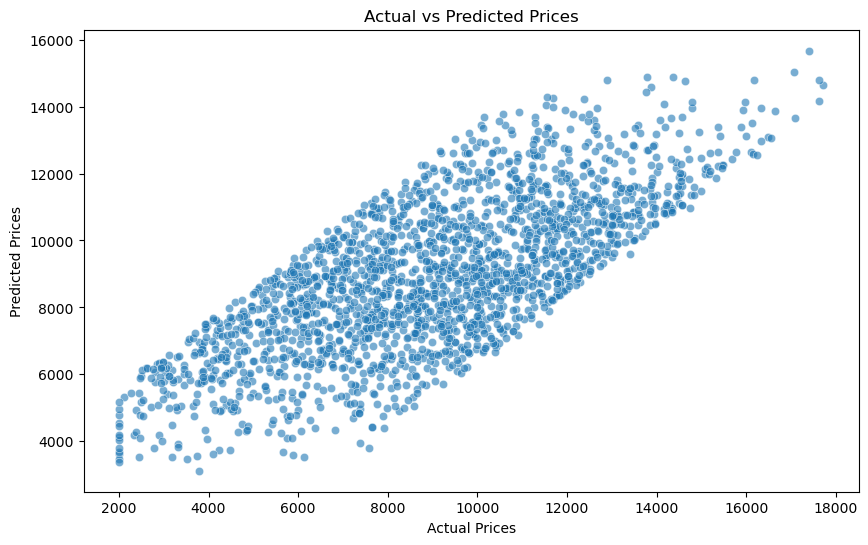

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()